In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt
from figure_manager import FigureManager
from plots import *

import DynamicTimeAllocationModel

path = 'output/'

fm = FigureManager(path, use_latex=False)

# c++ settings
do_compile = True
threads = 40

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

# Solve and simulate from alternative models

Benchmark model settings

In [2]:
settings = { 
       'T':4,
       'num_A': 50,
       'num_A_pd': 70,
       'num_K': 5,
       'num_power': 21,
       'num_love': 11,
       
       'simT': 4,
       'simN': 1000,

       'num_Ctot': 120,
       'num_marg_u':120,

       'phi_w': 1.0,
       'phi_m': 1.0,
       
       'mu_w': 0.3,
       
       'p_meet': 0.4,

       'threads':threads,
       'num_multistart': 5,
       
       'do_egm': False,
       'interp_method': 'linear',
       'interp_inverse': False,
       
       'precompute_intratemporal': True,
       'centered_gradient': True,
       }

In [3]:
show_iEGM = True
show_VFI = True
show_numEGM = False
show_iEGMinv = False

In [4]:
if show_iEGM:
    settings_iEGM = settings.copy()
    settings_iEGM['do_egm'] = True
    settings_iEGM['interp_method'] = 'linear'
    settings_iEGM['interp_inverse'] = False
    
    model_iEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGM)
    model_iEGM.link_to_cpp(force_compile=do_compile)

    %time model_iEGM.solve()
    # %time model_iEGM.simulate()
    
    model_iEGM.cpp.delink()

CPU times: total: 31.4 s
Wall time: 3.62 s


In [5]:
if show_VFI:
    settings_VFI = settings.copy()
    settings_VFI['do_egm'] = False
    
    model_VFI = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_VFI)
    model_VFI.link_to_cpp(force_compile=do_compile)
    
    %time model_VFI.solve()
    %time model_VFI.simulate()

    model_VFI.cpp.delink()

CPU times: total: 1h 5min 23s
Wall time: 3min 31s
CPU times: total: 0 ns
Wall time: 4.98 ms


In [6]:
if show_numEGM:
    settings_numEGM = settings.copy()
    settings_numEGM['do_egm'] = True
    settings_numEGM['interp_method'] = 'numerical'
    
    model_numEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_numEGM)
    model_numEGM.link_to_cpp(force_compile=do_compile)
    
    %time model_numEGM.solve()
    # %time model_numEGM.simulate()
    
    model_numEGM.cpp.delink()

In [7]:
if show_iEGMinv:
    settings_iEGMinv = settings.copy()
    settings_iEGMinv['do_egm'] = True
    settings_iEGMinv['interp_method'] = 'linear'
    settings_iEGMinv['interp_inverse'] = True
    
    model_iEGMinv = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGMinv)
    model_iEGMinv.link_to_cpp(force_compile=do_compile)
    
    %time model_iEGMinv.solve()
    # %time model_iEGMinv.simulate()
 
    model_iEGMinv.cpp.delink()

Setup plotters

In [8]:
if show_iEGM:    mp_iEGM = model_plotter(model_iEGM, model_name='iEGM', titles=['variable'], labels=['model', 'index'])
if show_VFI:     mp_VFI = model_plotter(model_VFI, model_name='VFI', titles=['variable'], labels=['model', 'index'])
if show_numEGM:  mp_numEGM = model_plotter(model_numEGM, model_name='numEGM', titles=['variable'], labels=['model', 'index'])
if show_iEGMinv: mp_iEGMinv = model_plotter(model_iEGMinv, model_name='iEGMinv', titles=['variable'], labels=['model', 'index'])

save_figures = False
grid = 'grid_A'
idx = {'t': 2, 'il':2, 'iK': 3, 'iP': 18, 'iL': 5, 'iA': 30, 'iA_pd': 60}
t, iK, iP, iL, iA = idx['t'], idx['iK'], idx['iP'], idx['iL'], idx['iA']

## Singles solution

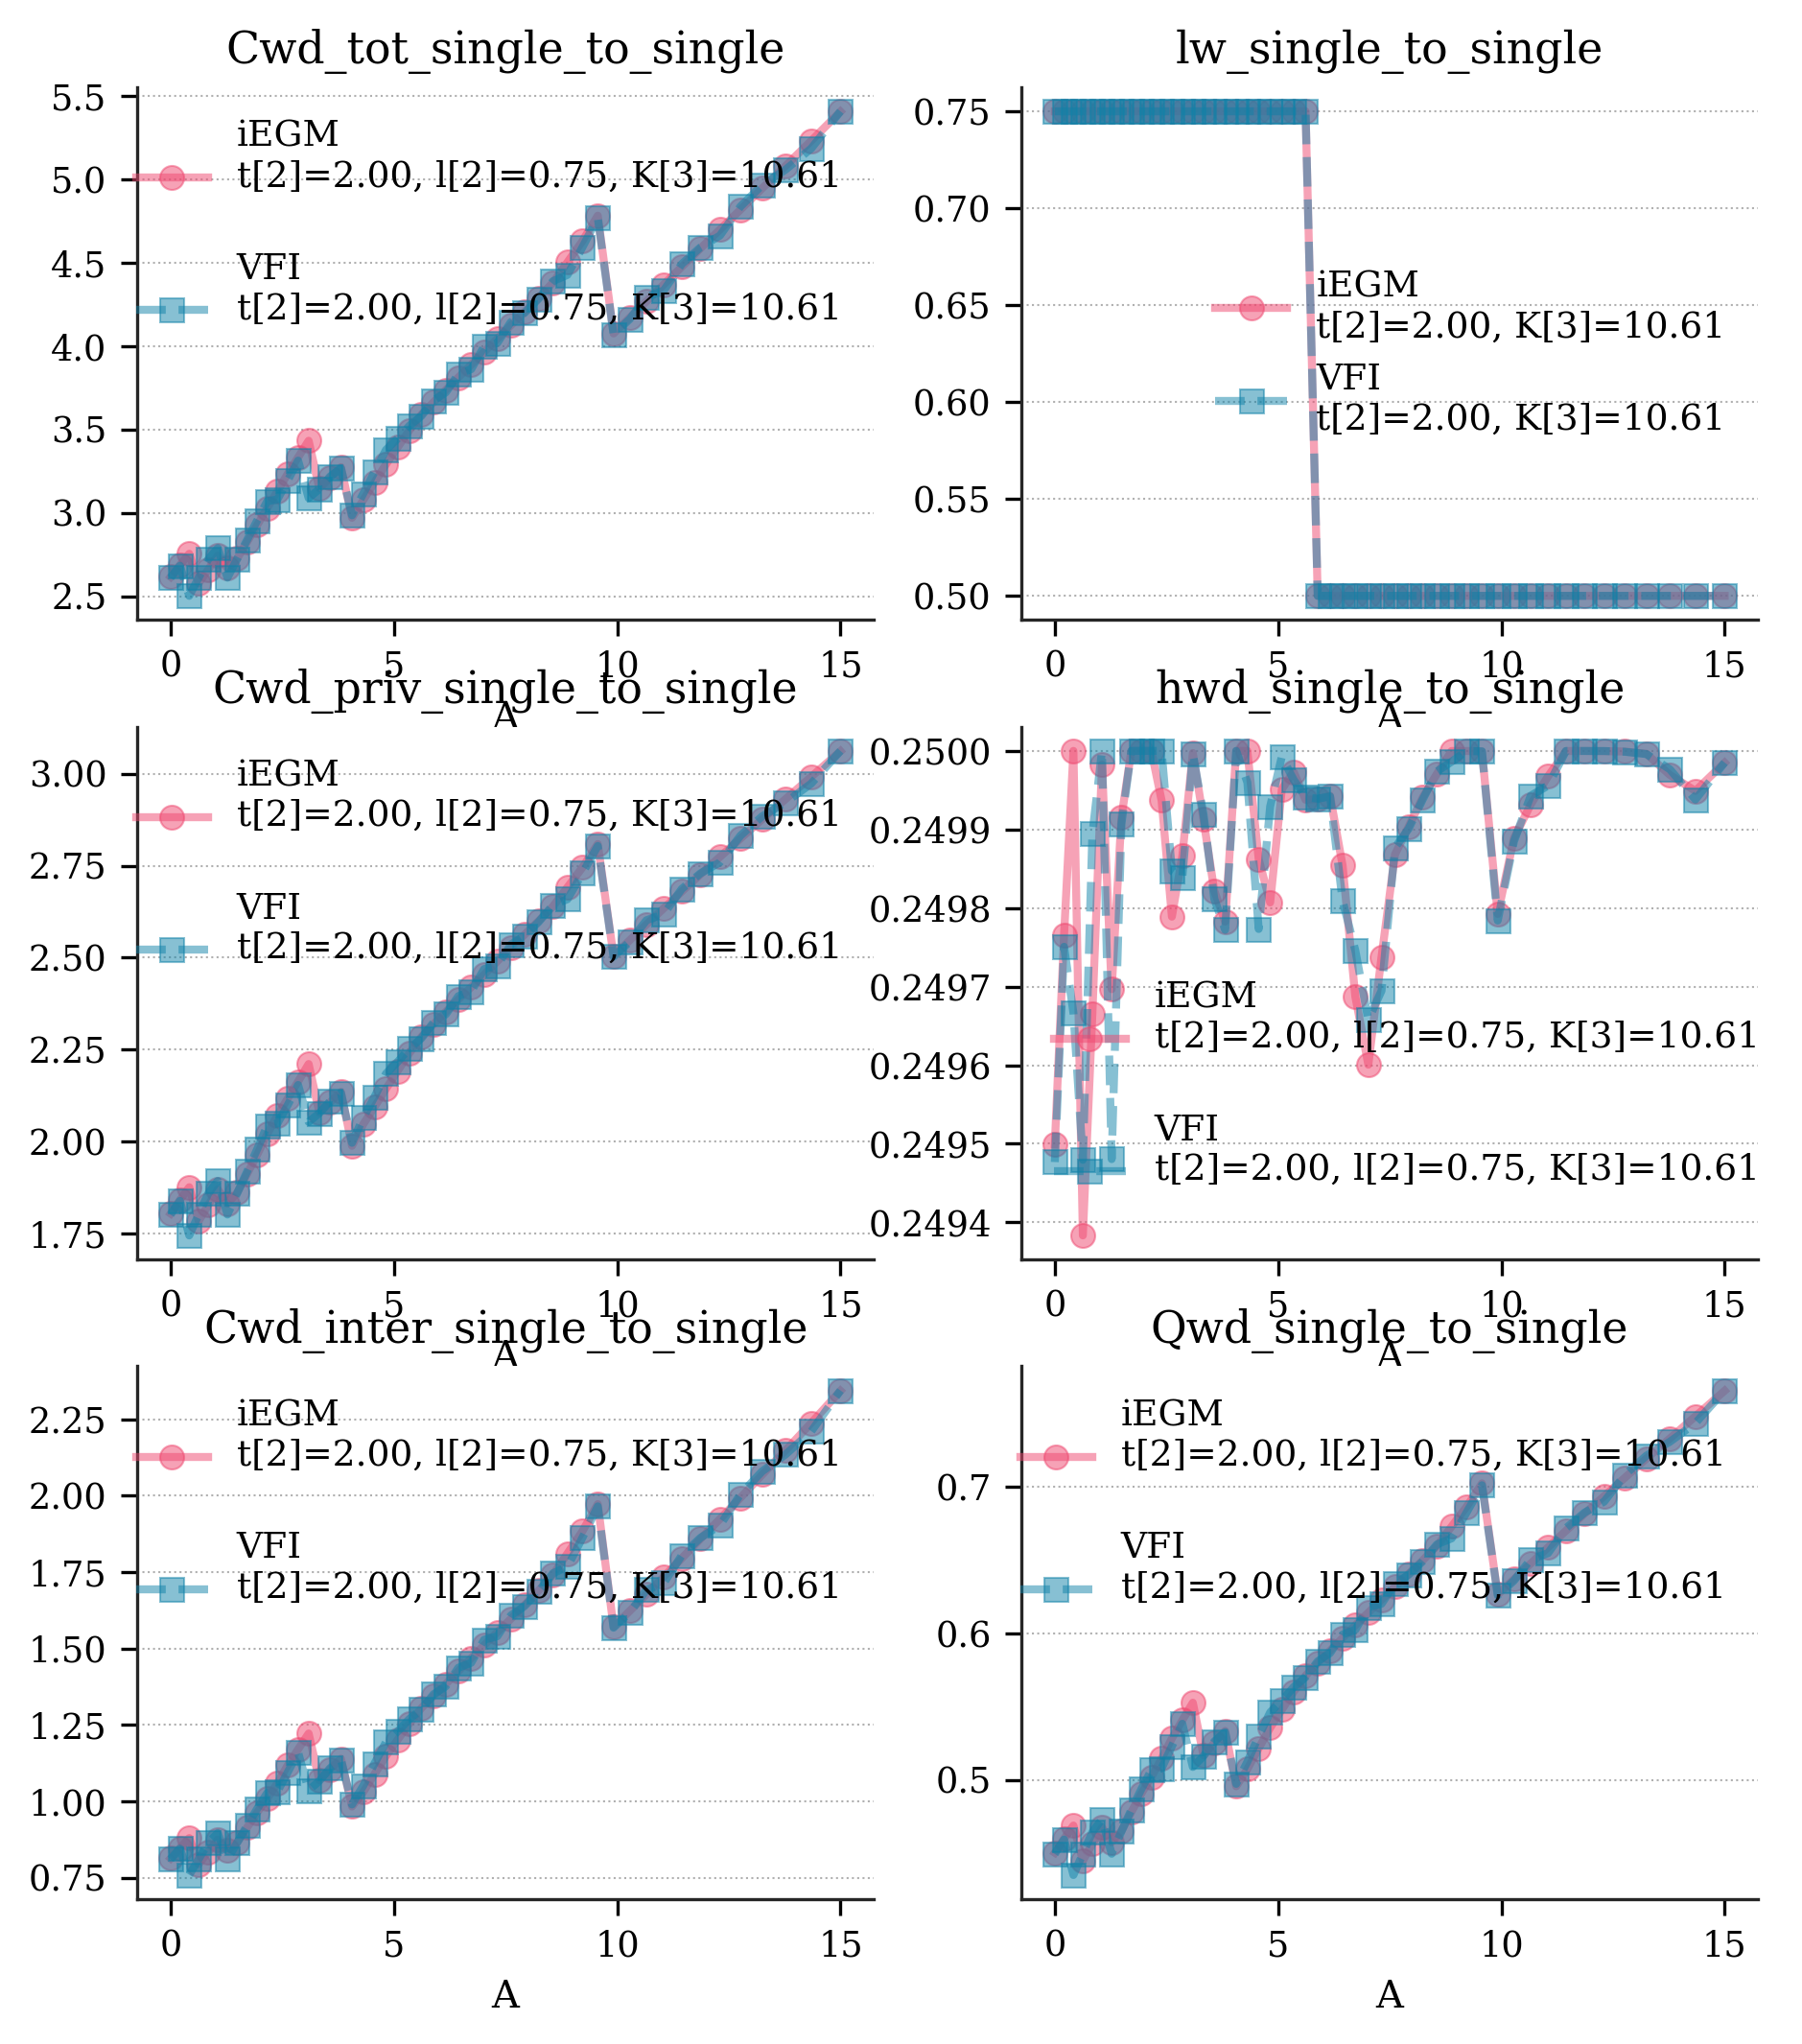

In [9]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_choices")

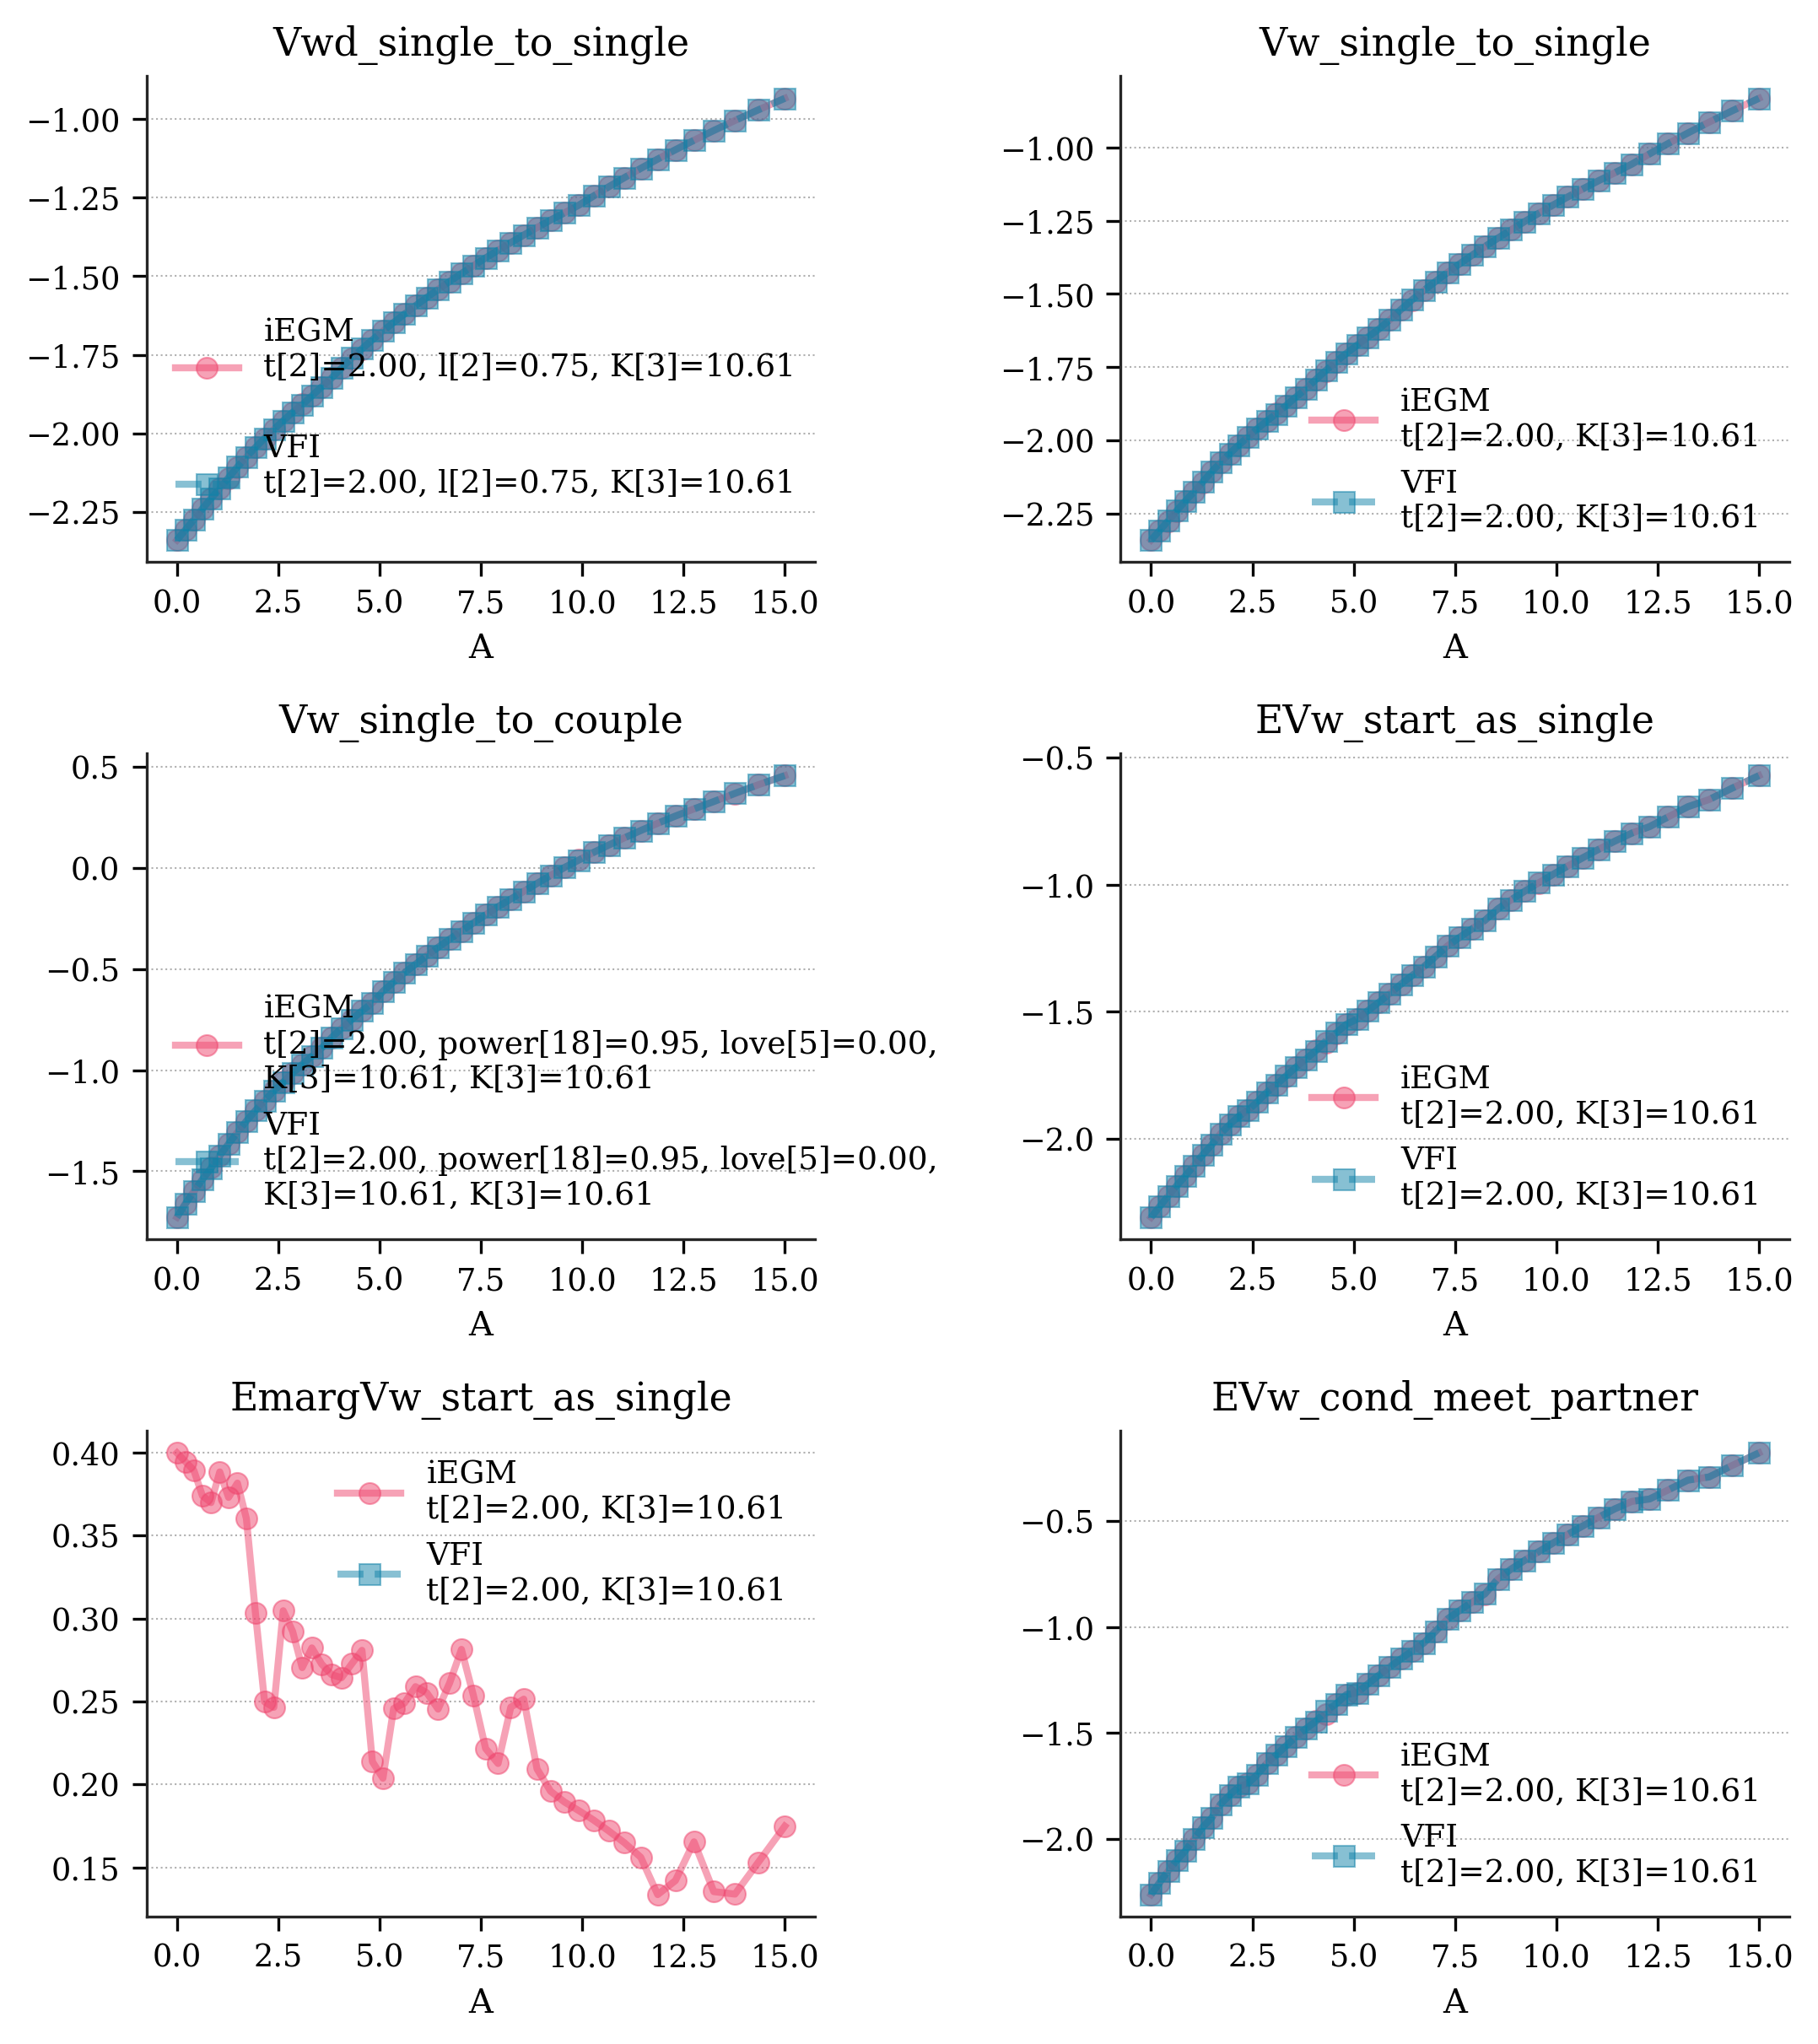

In [10]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_values")
else: fig.tight_layout()

## Couples solution

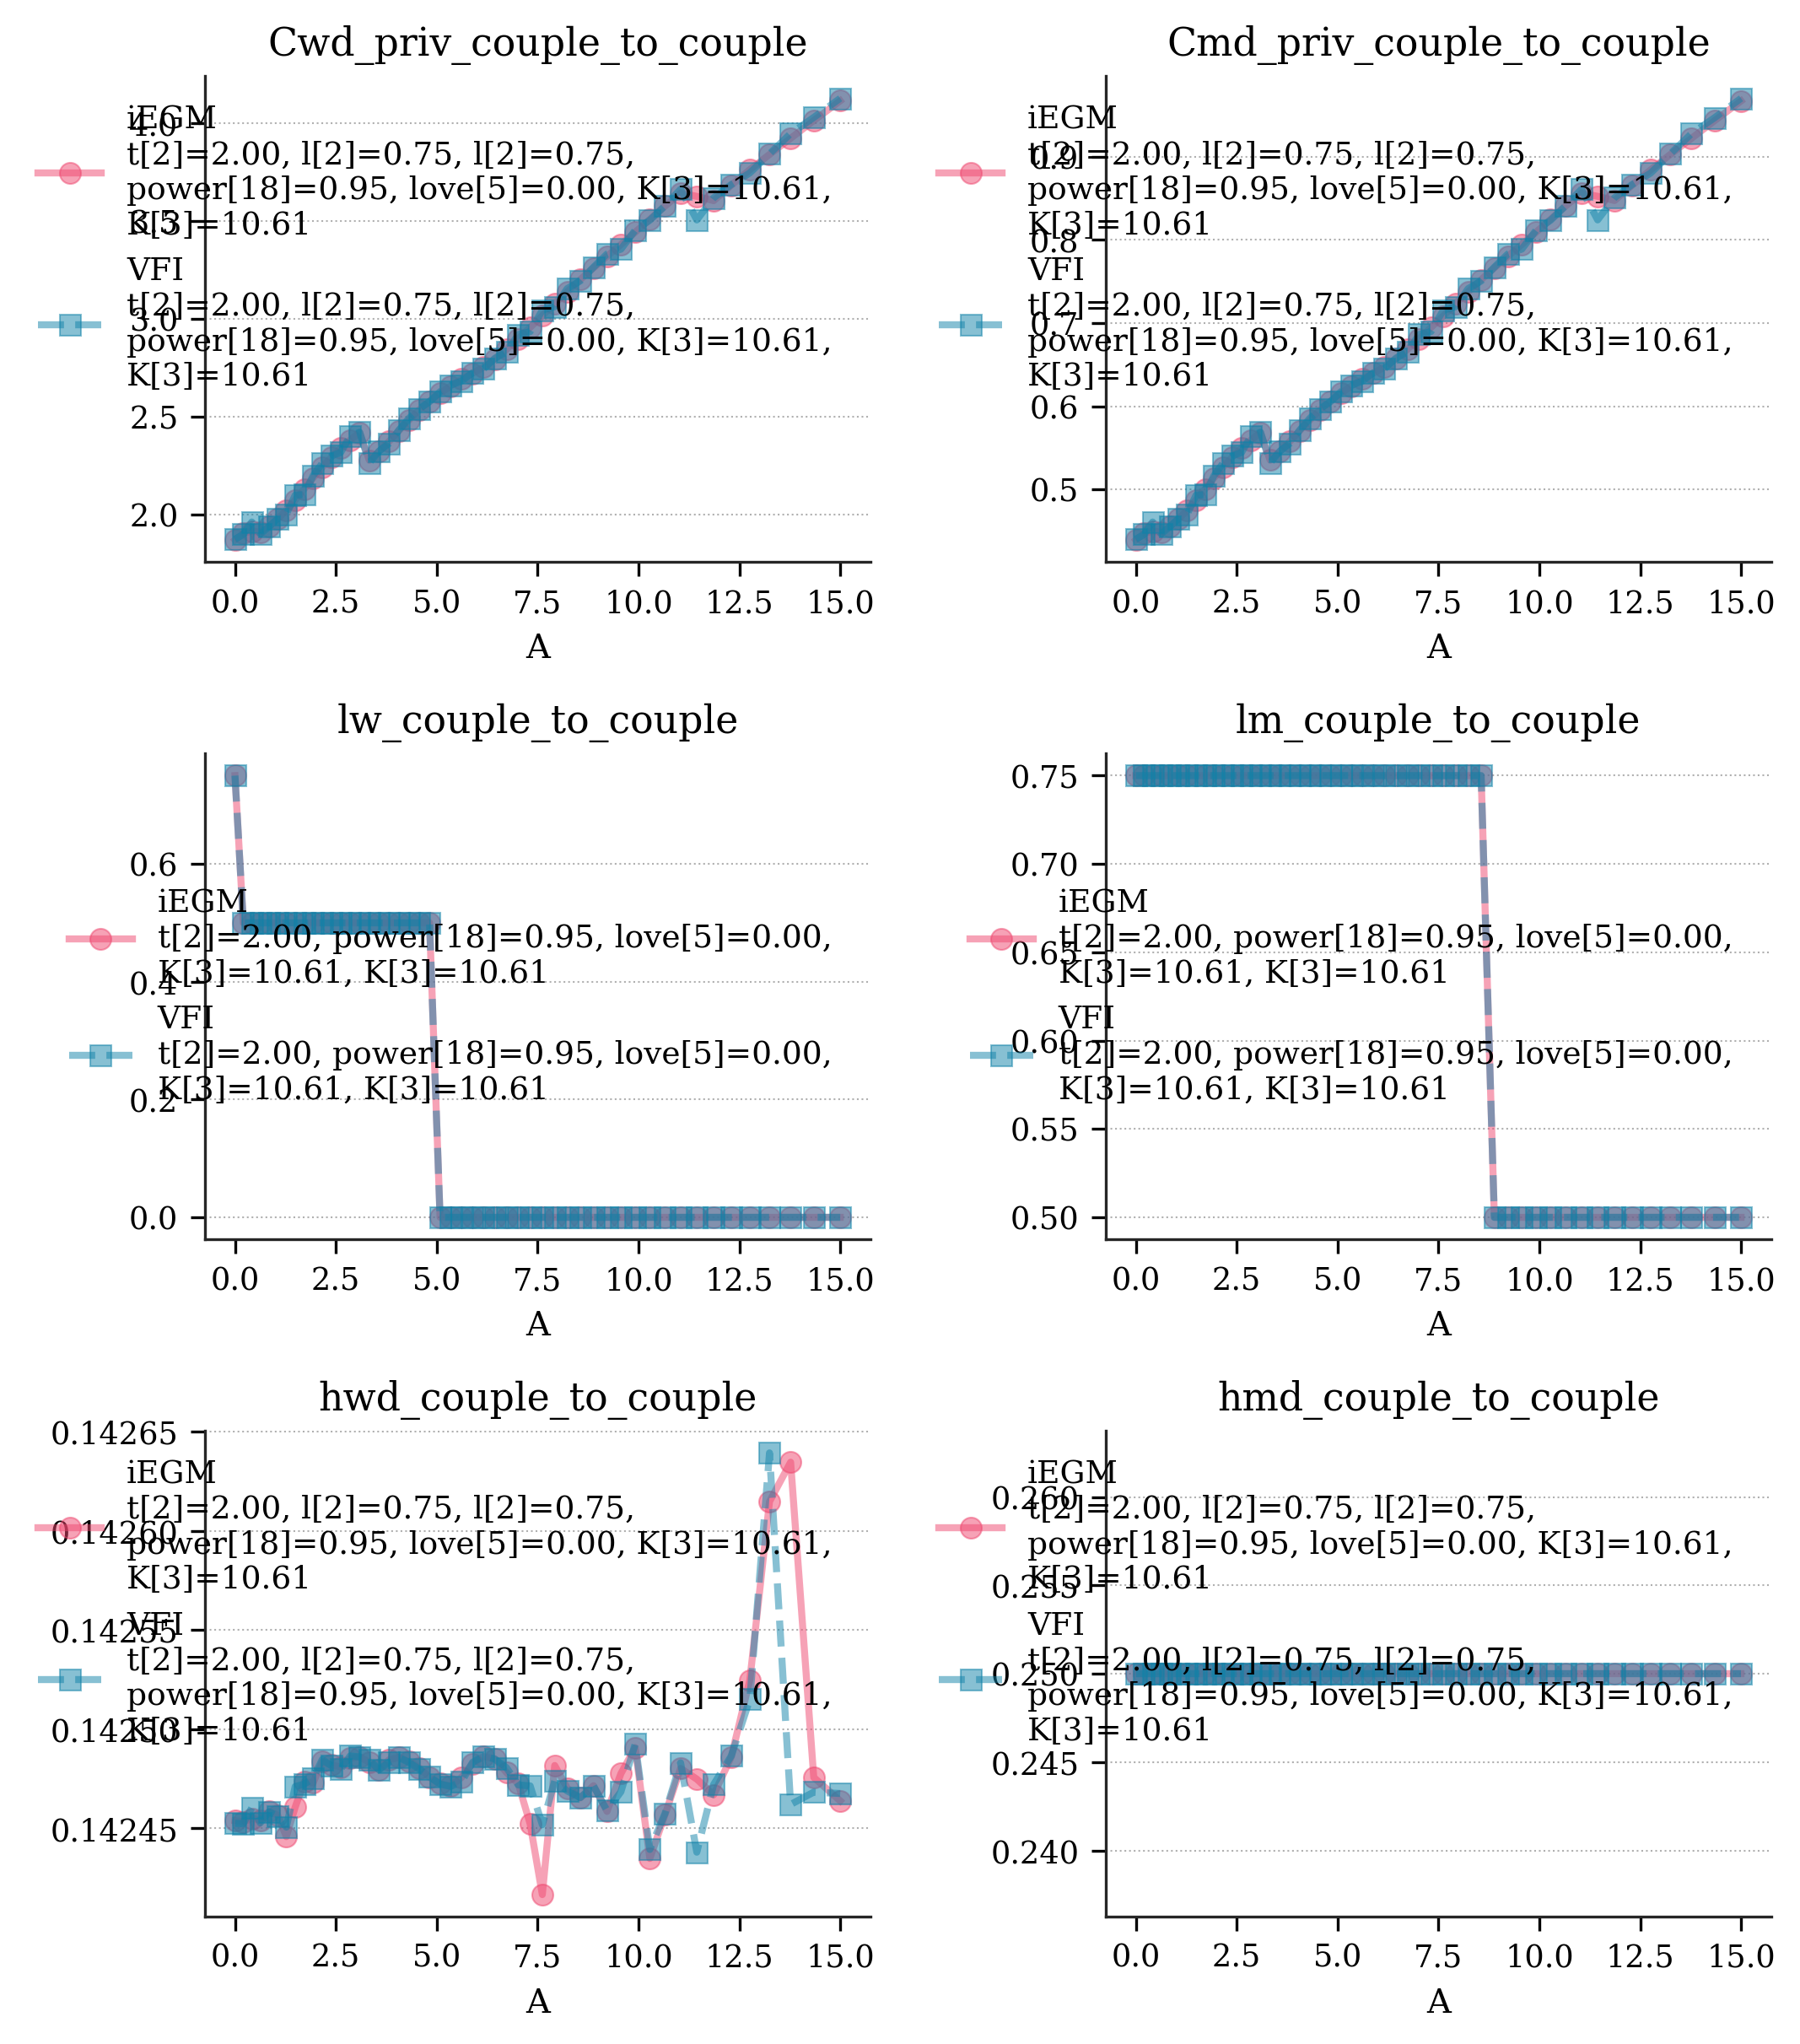

In [11]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="gender_couple_choices")
else: fig.tight_layout()

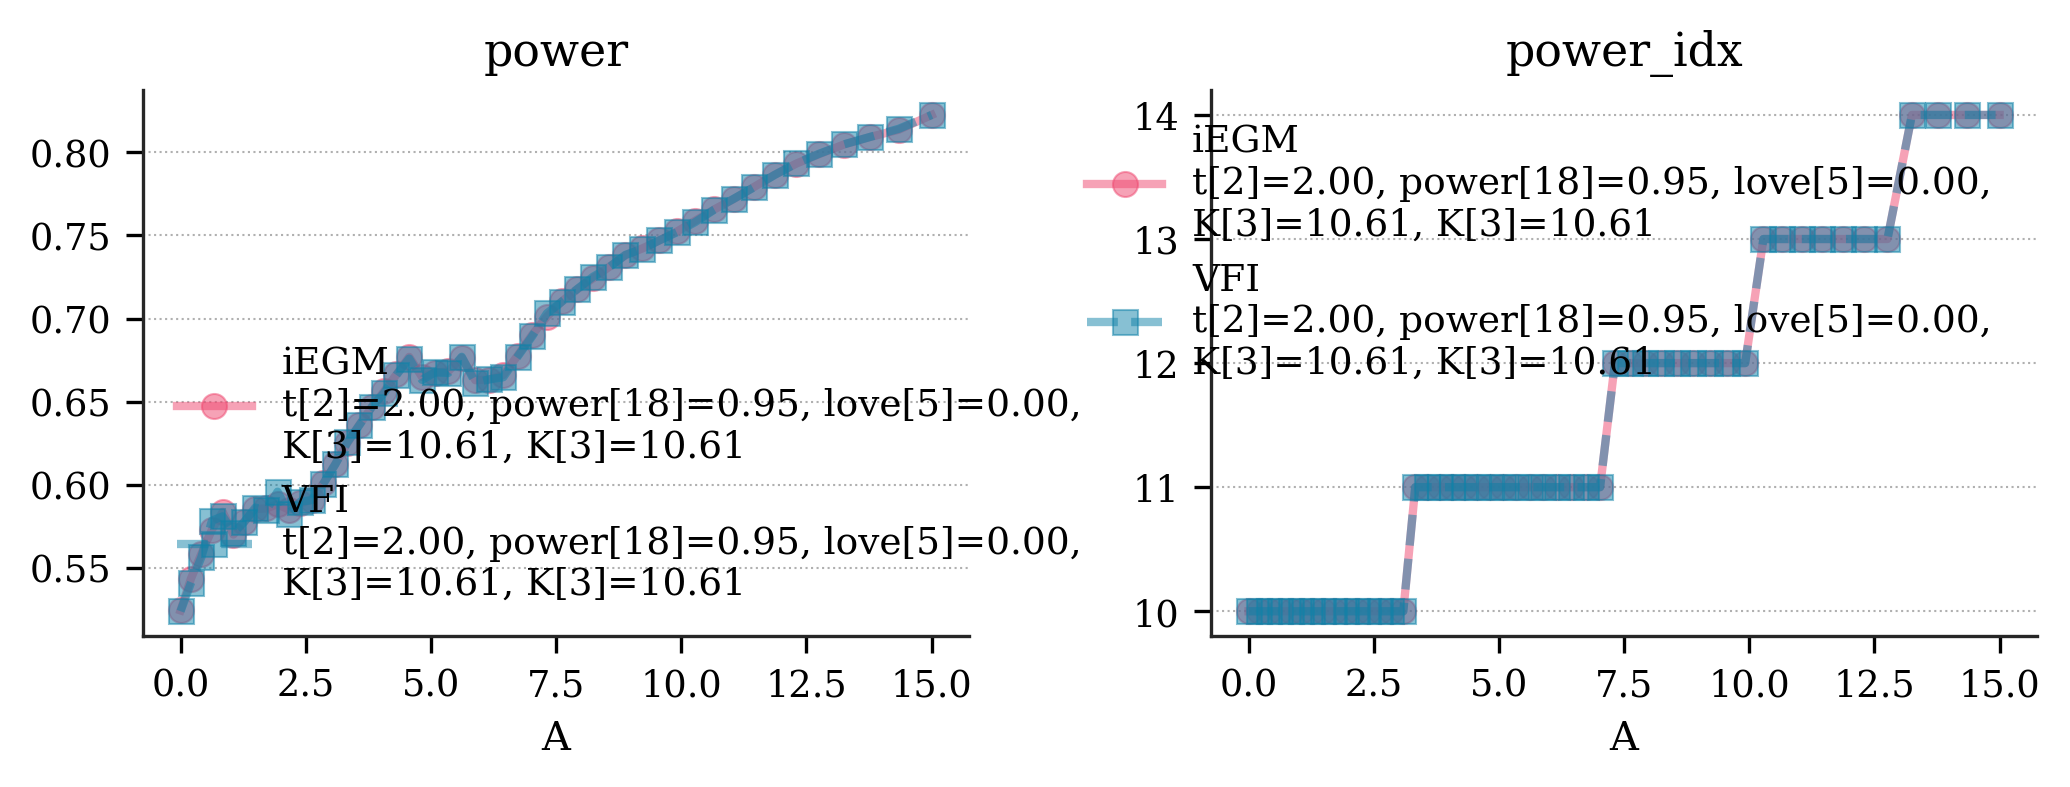

In [12]:
# model_iEGM.sol.power.shape #[idx['t'], idx['iP'], idx['iL'], :]
fig, ax = fm.create_figure(1,2,2)
if show_iEGM:    mp_iEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="power")
else: fig.tight_layout()

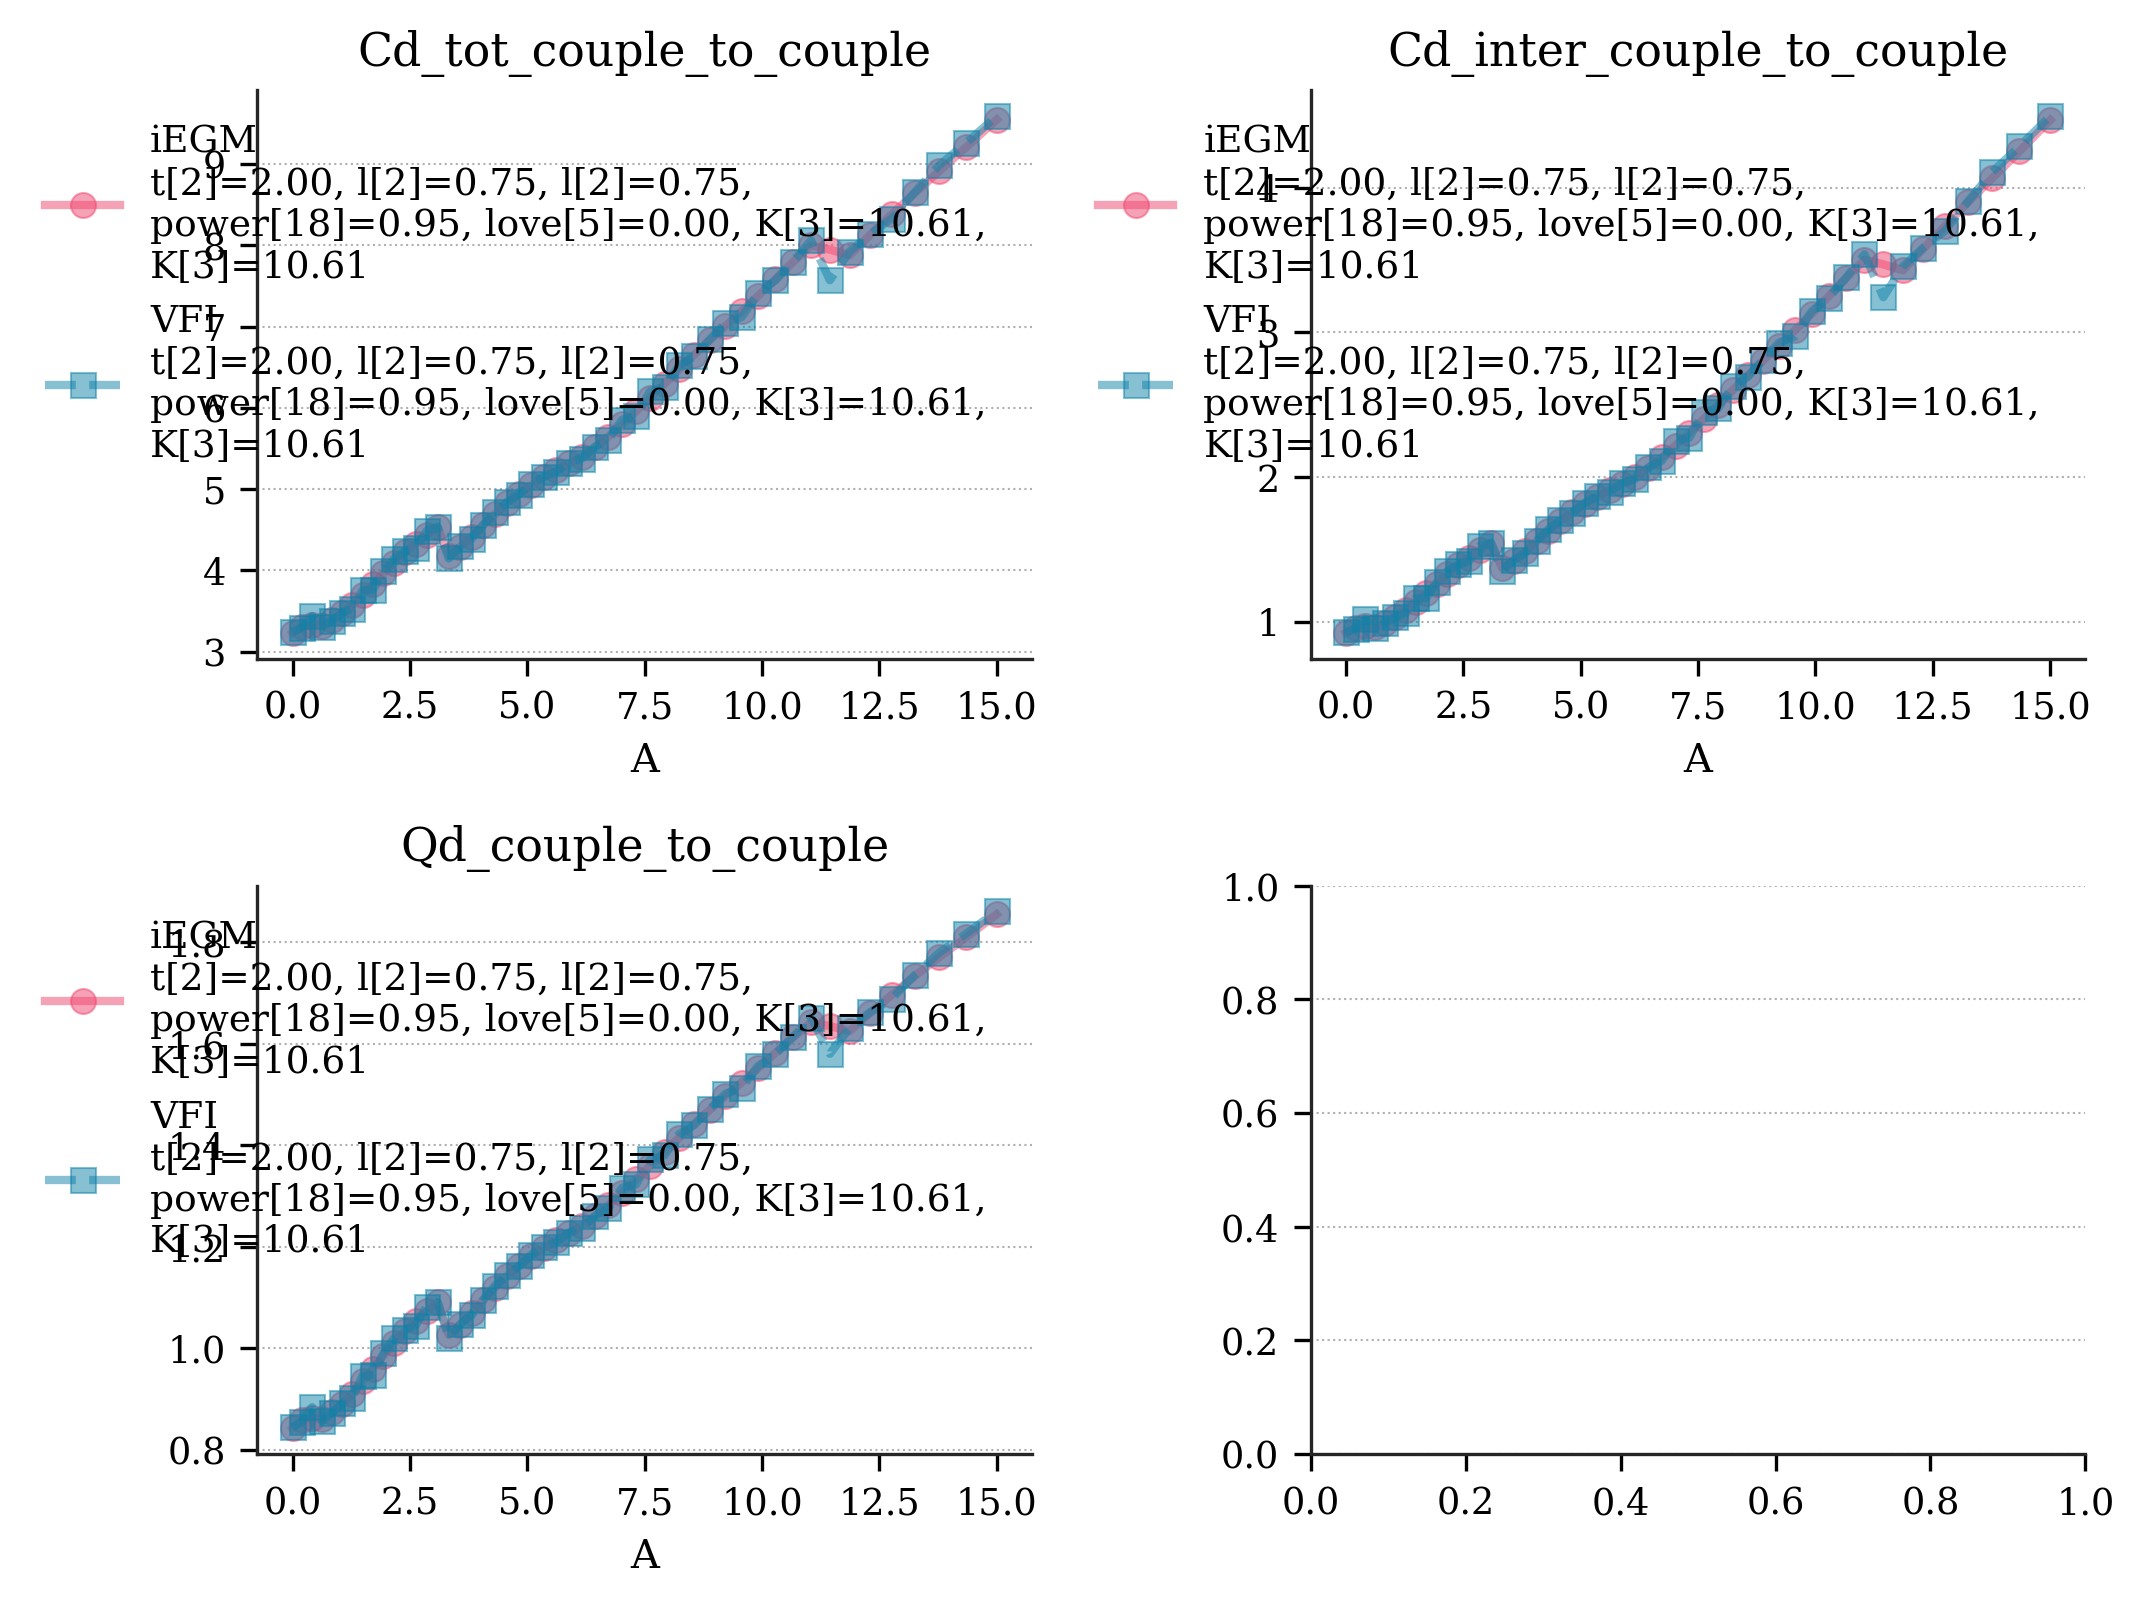

In [13]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_choices")
else: fig.tight_layout()


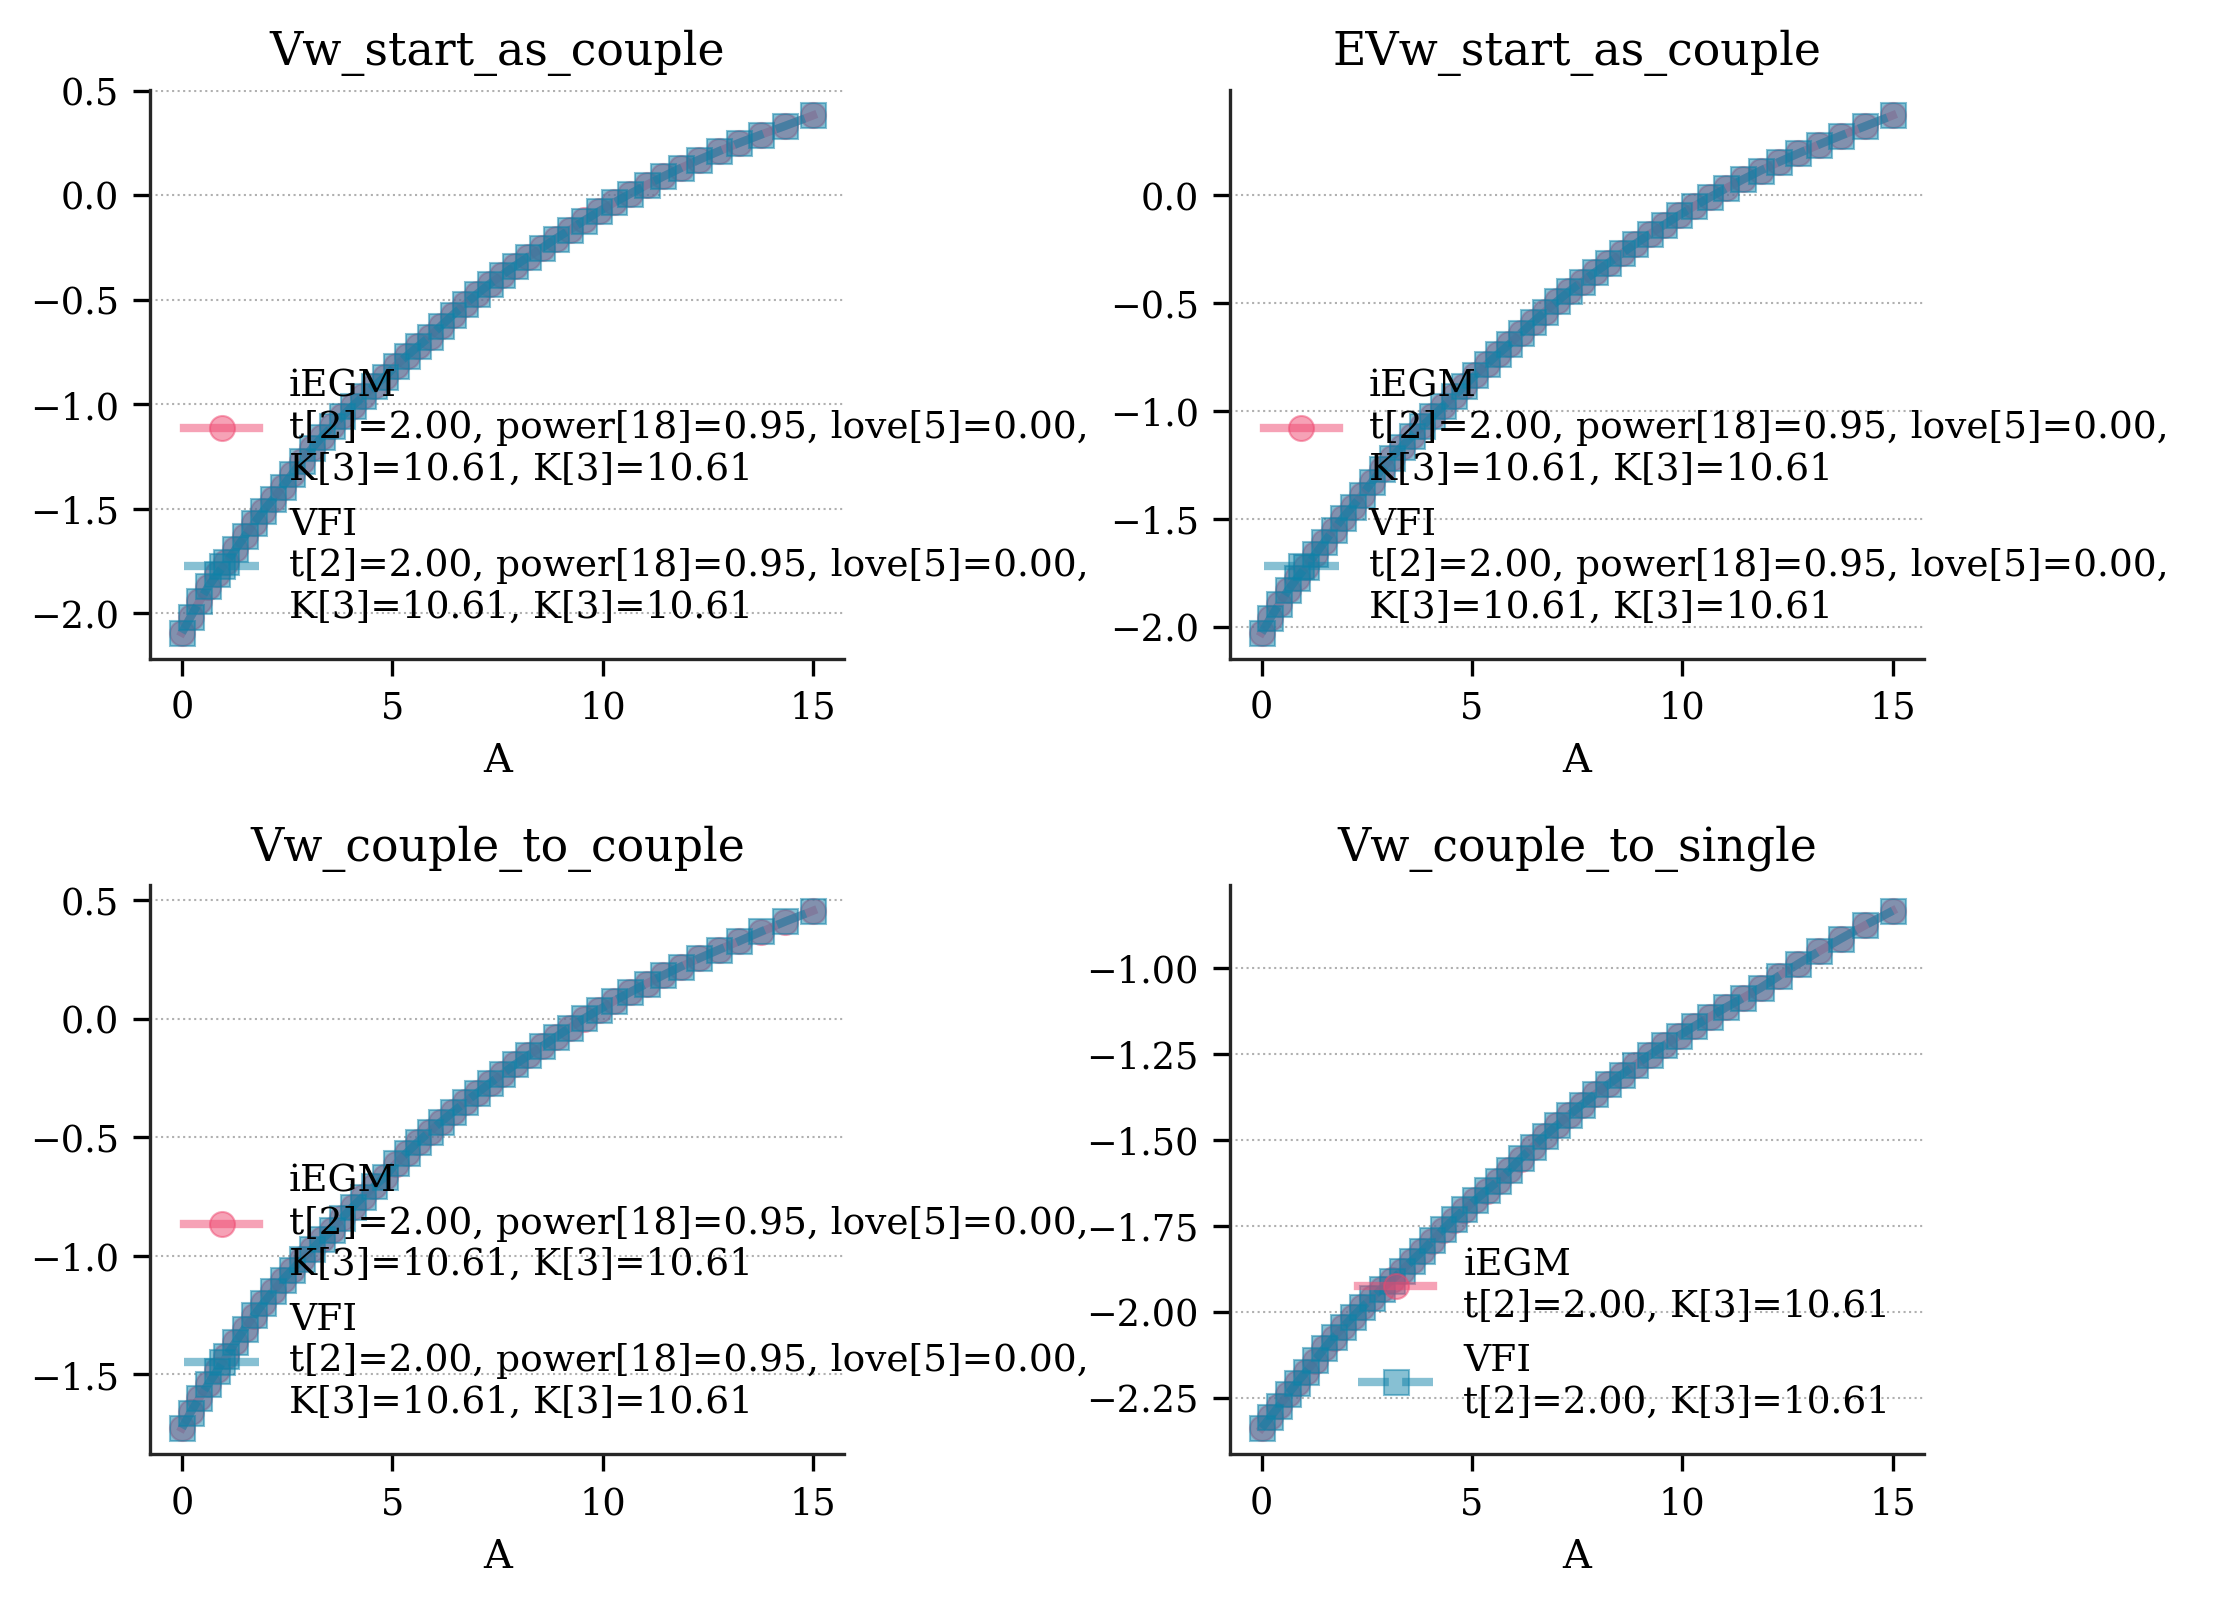

In [14]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_couple_values")
else: fig.tight_layout()


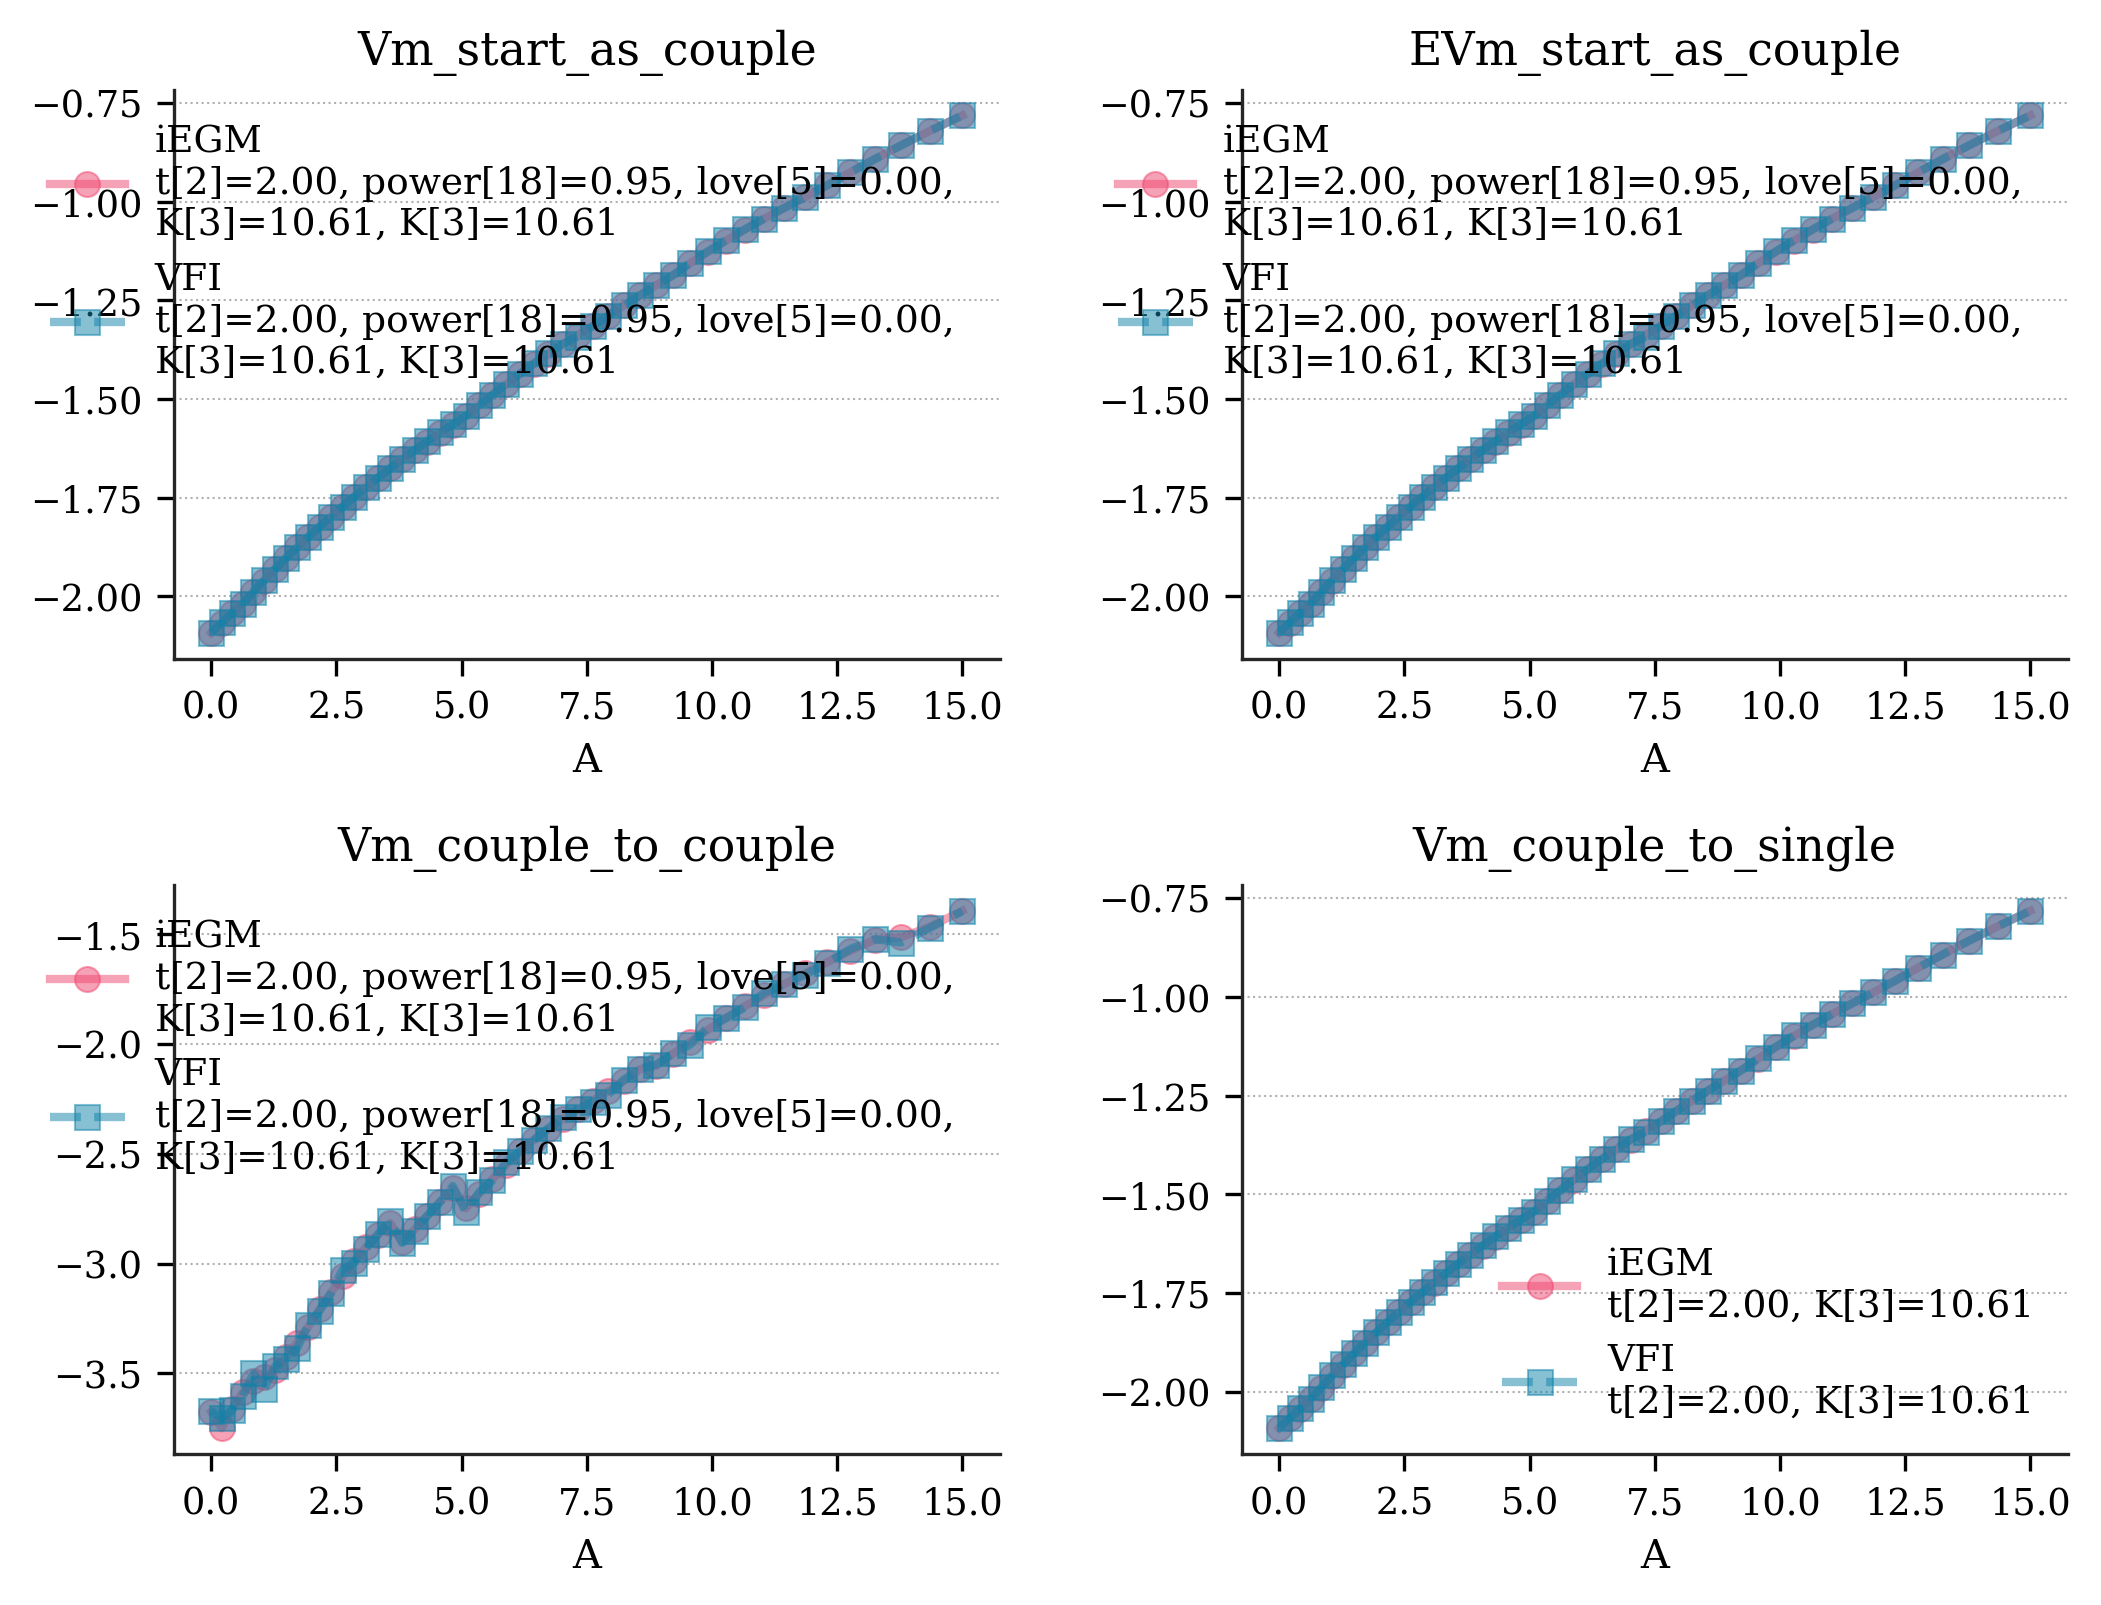

In [15]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="male_couple_values")
else: fig.tight_layout()


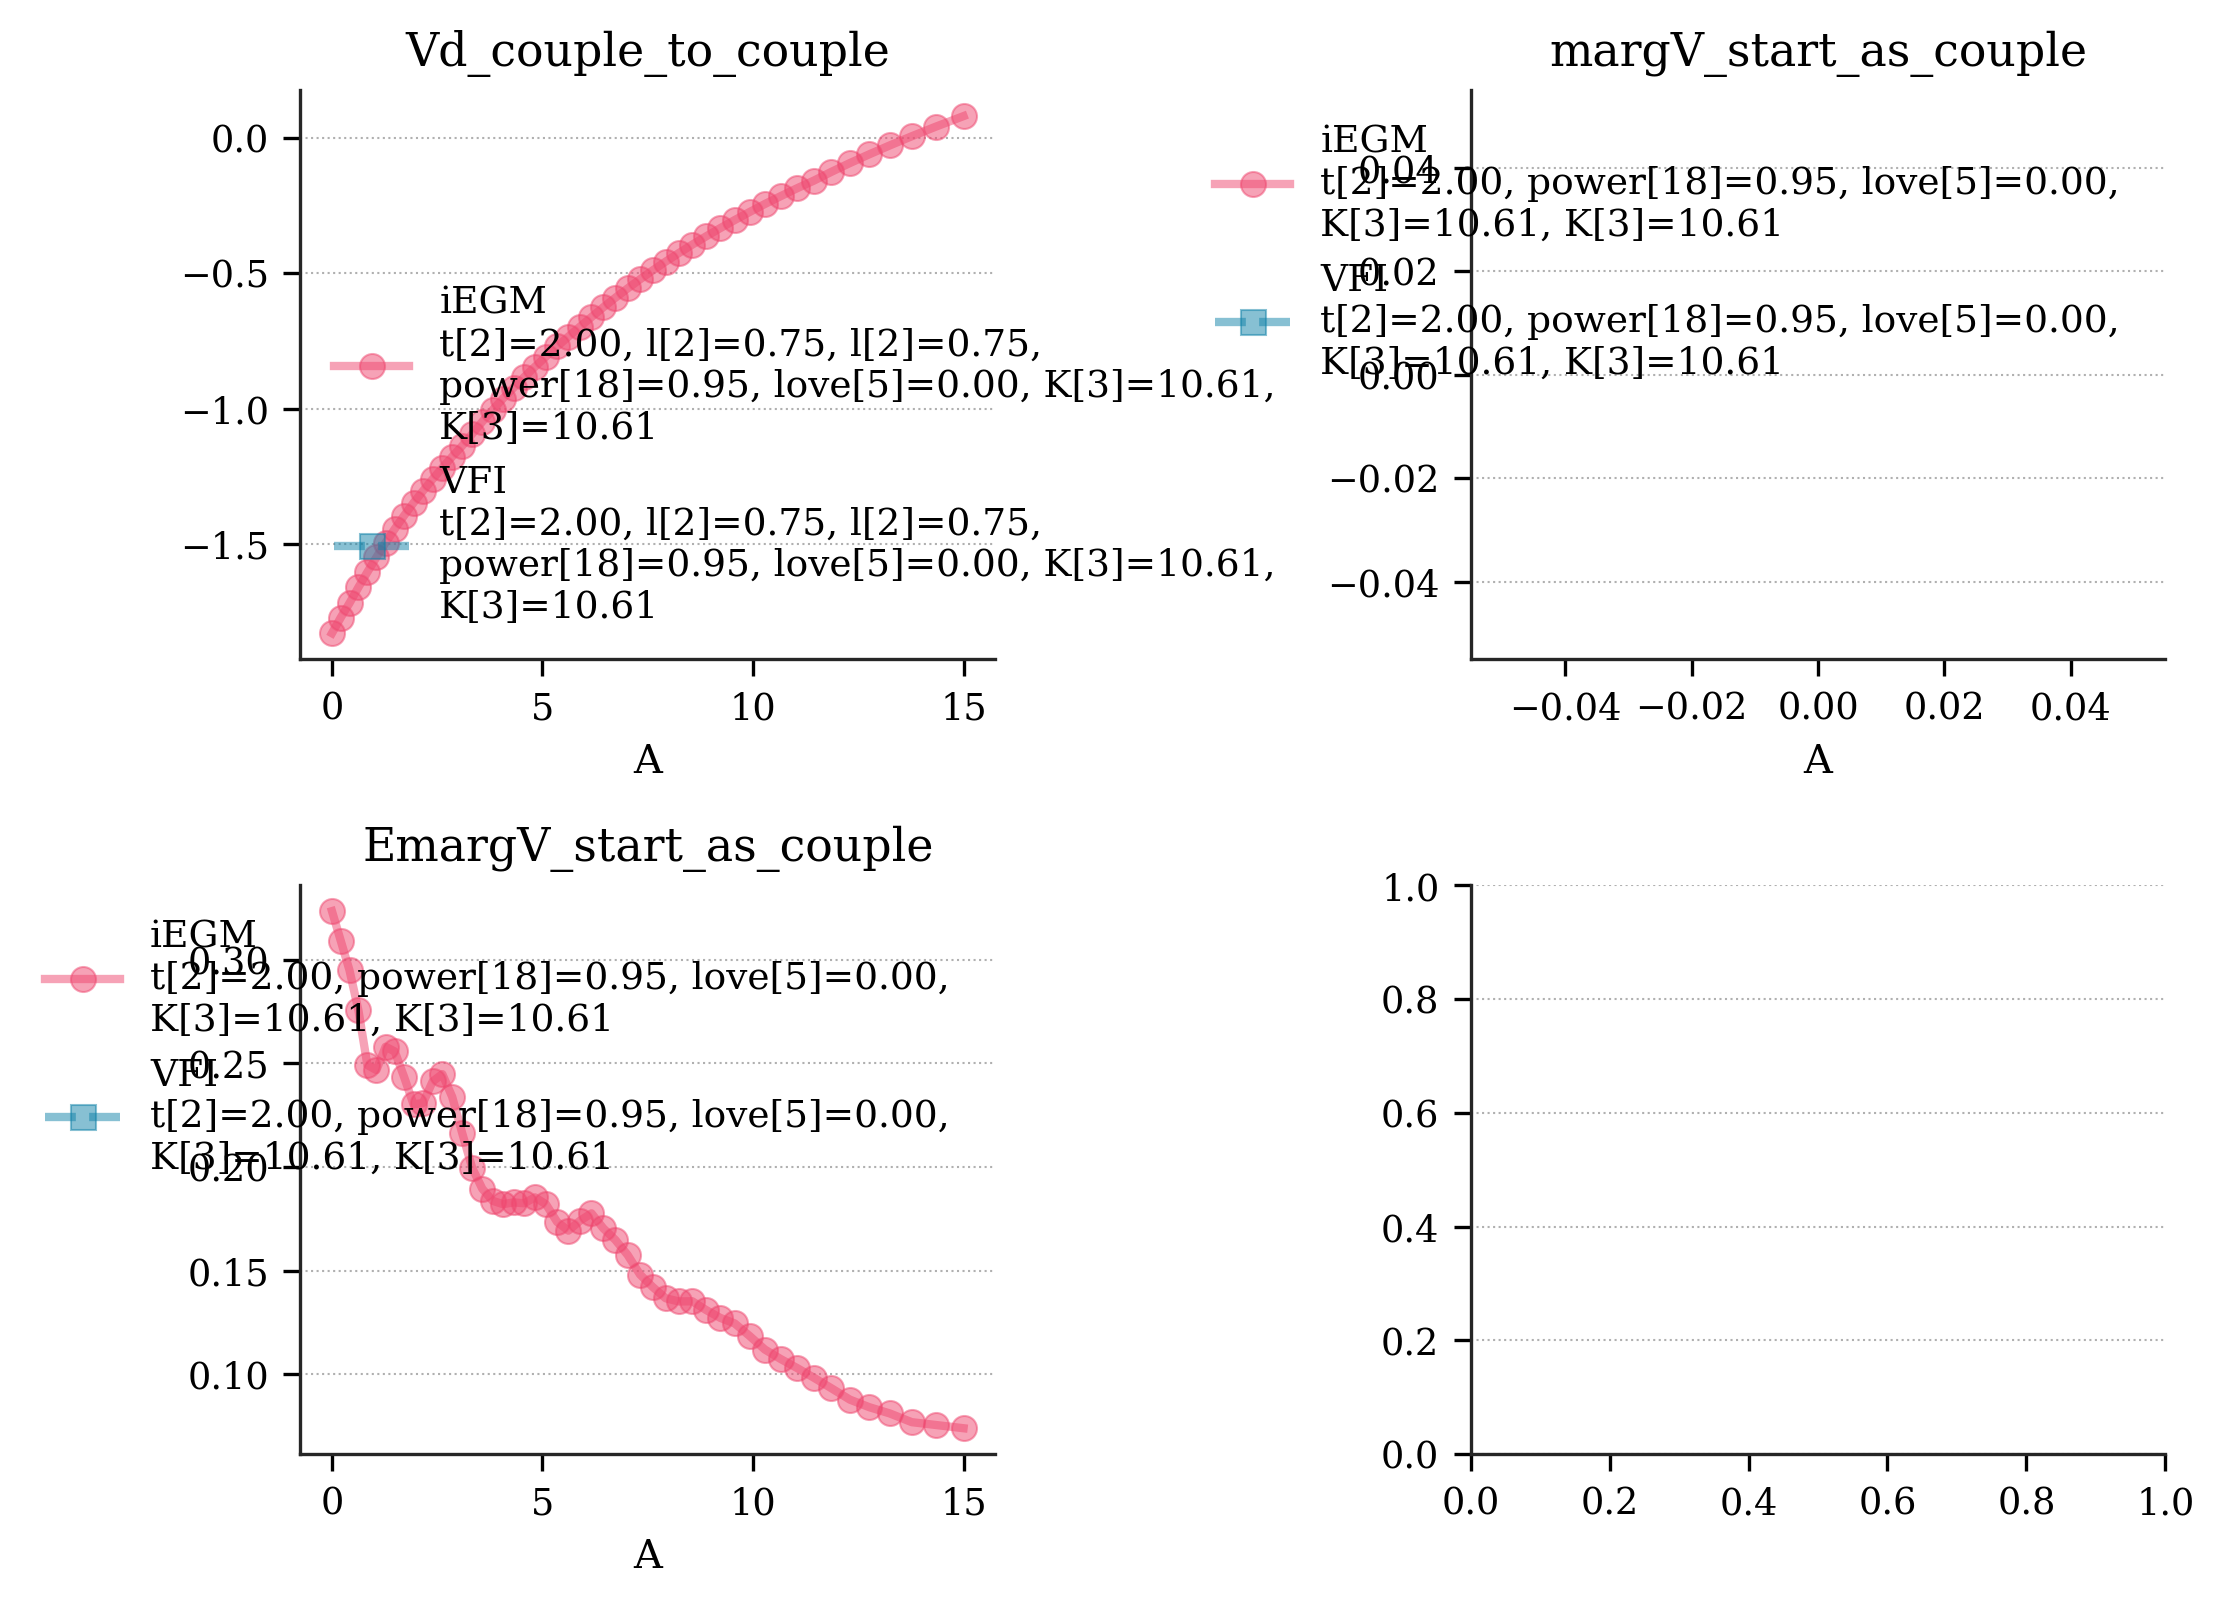

In [16]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_values")
else: fig.tight_layout()


## Simulation

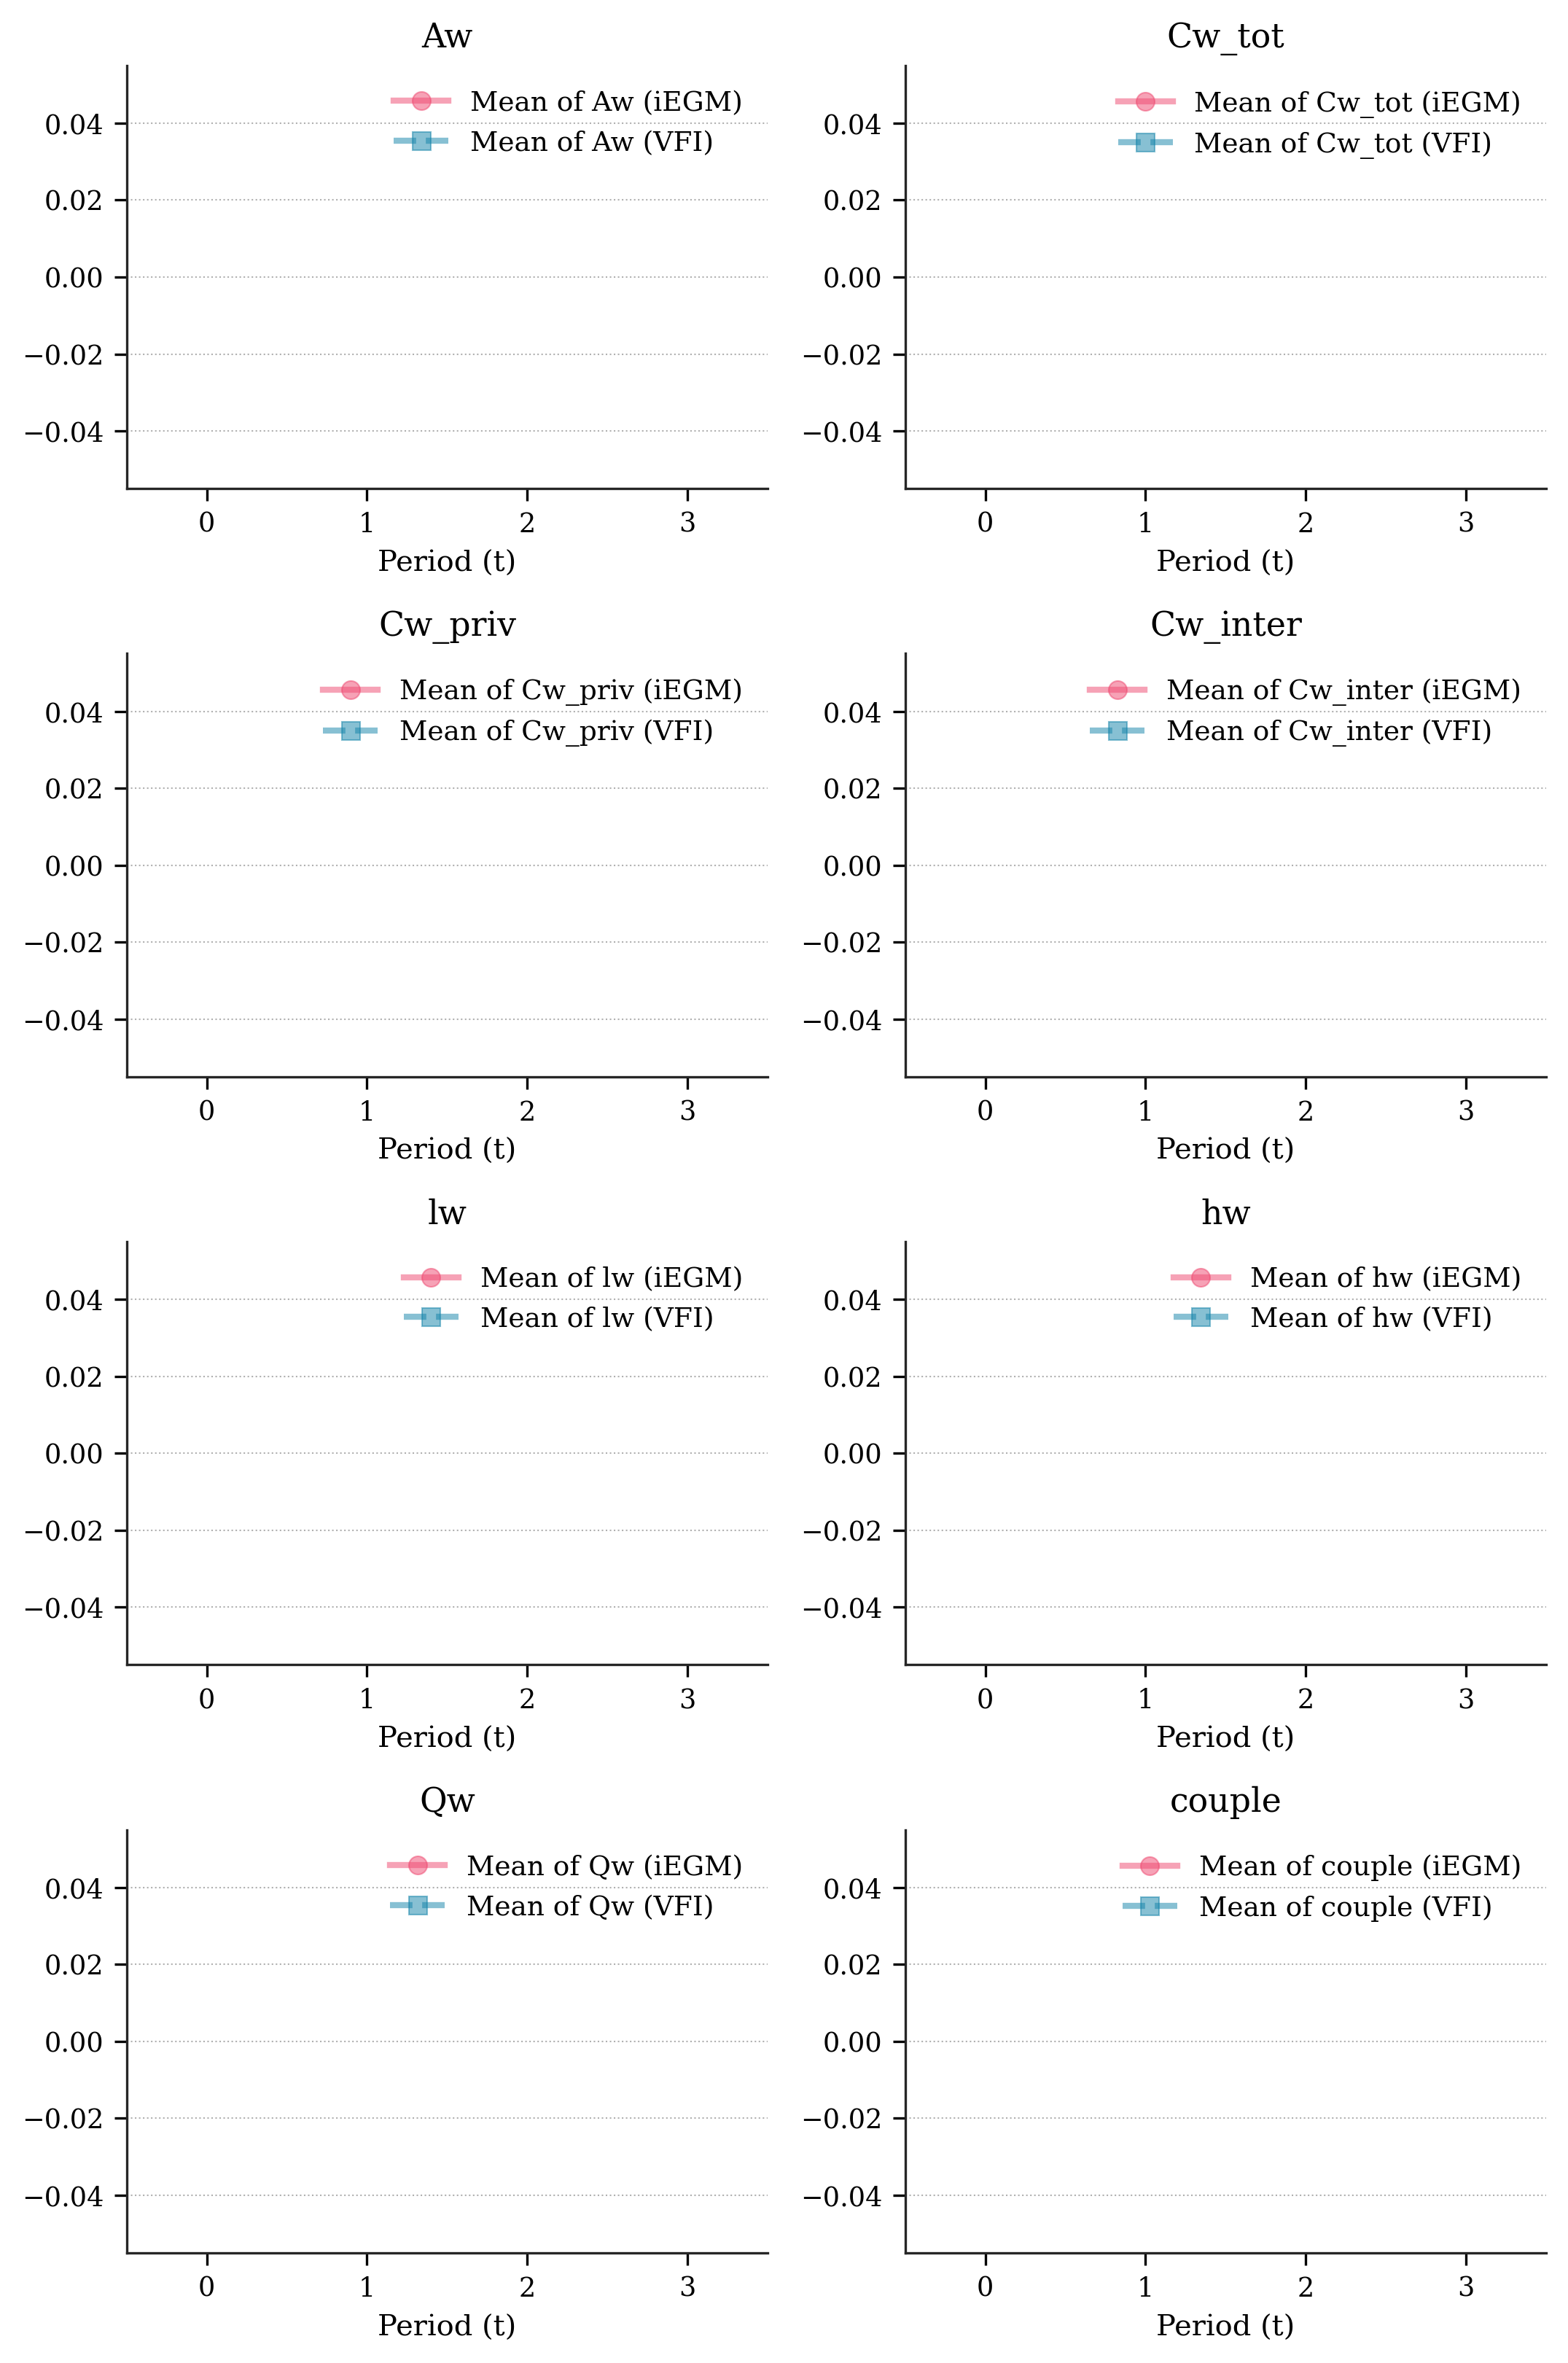

In [17]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_all")
else: fig.tight_layout()

ValueError: No data points match the condition: couple == 0

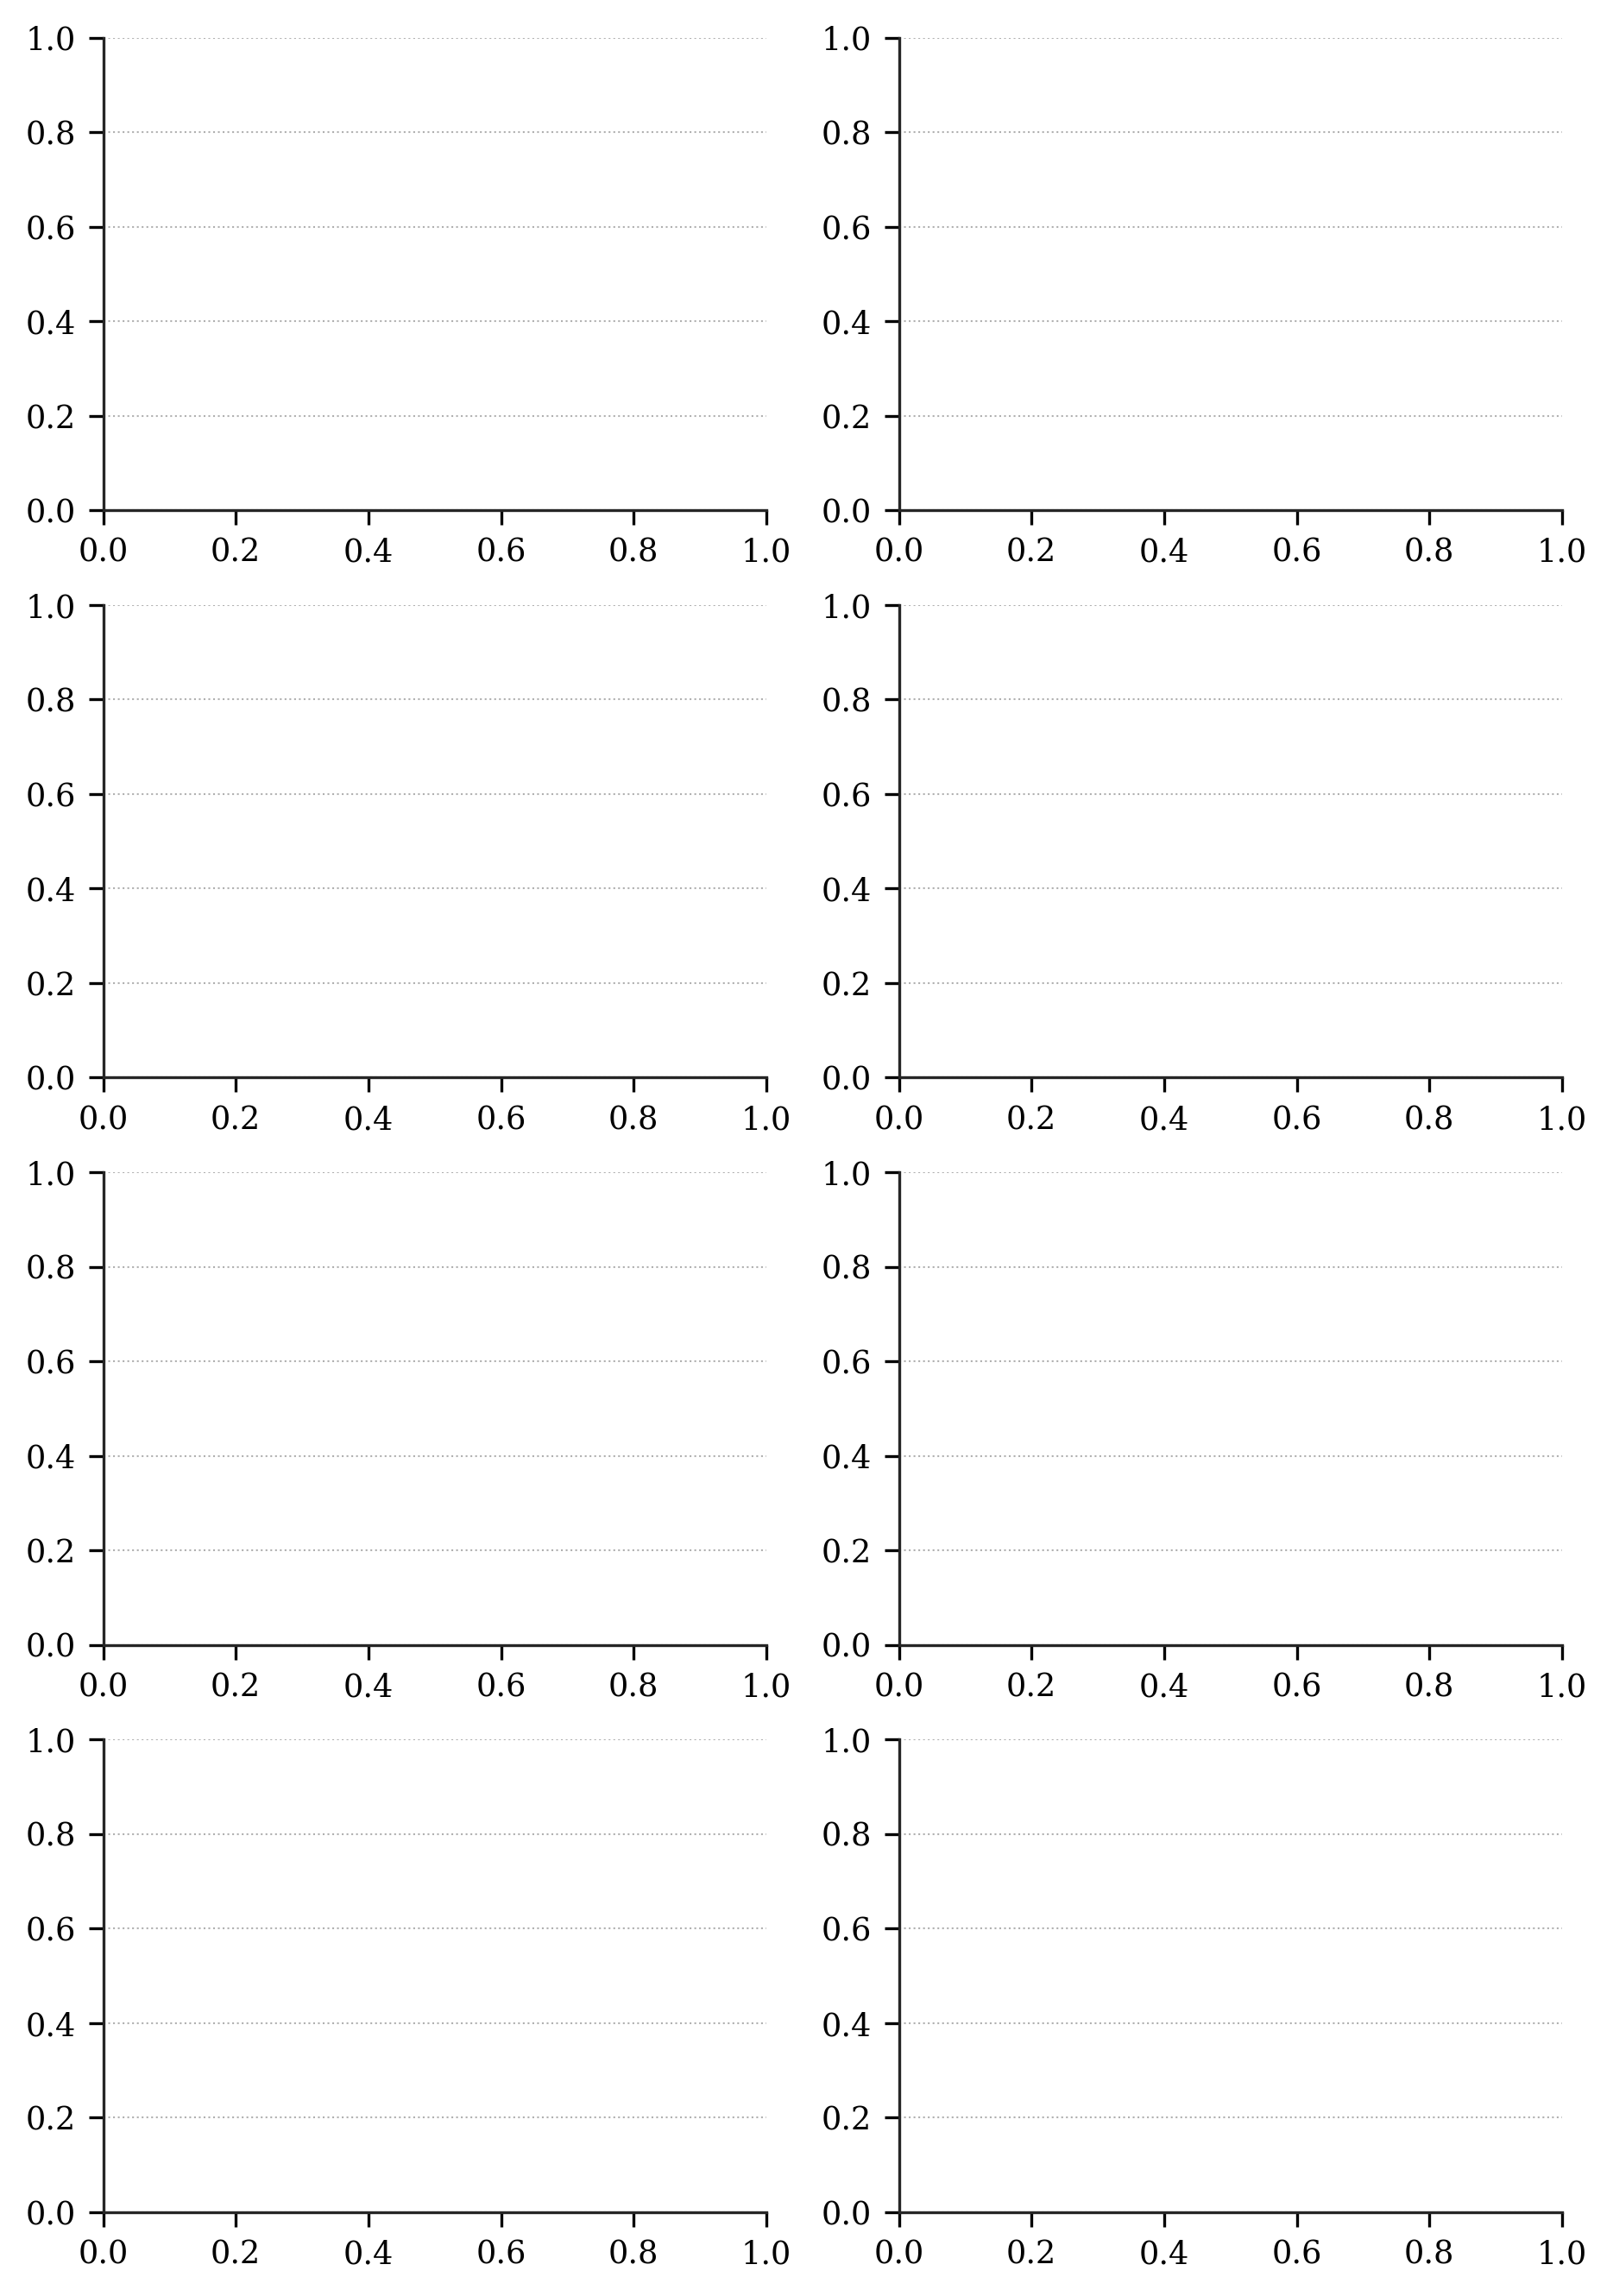

In [18]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_single(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_single(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_single(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_single(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_single")
else: fig.tight_layout()

In [ ]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_couple")
else: fig.tight_layout()

In [ ]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_sim_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_couple")
else: fig.tight_layout()

In [ ]:
fig, ax = fm.create_figure(4,2,8)
mp_iEGM.plot_sim_female(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()

In [ ]:
fig, ax = fm.create_figure(2,2,4)
mp_iEGM.plot_sim_couple(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()